# Housing data analysis

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [5]:
df = pd.read_csv("./train.csv")

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html

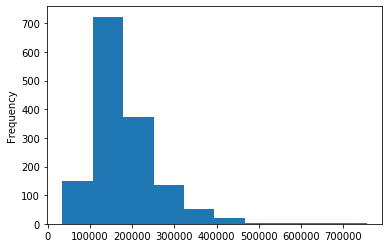

In [14]:
df['SalePrice'].plot(kind='hist')


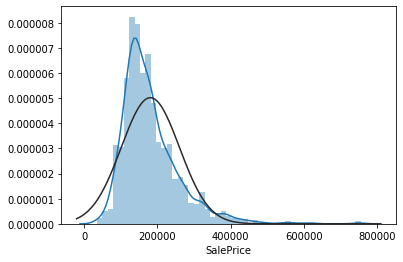

In [25]:
sns.distplot(df['SalePrice'], fit=norm
            )

In [26]:
df_=df.copy()

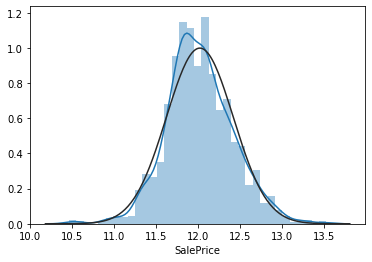

In [27]:
df_['SalePrice']=np.log1p(df_['SalePrice'])
sns.distplot(df_['SalePrice'], fit=norm
            )

In [32]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=
                                                              False)
missing_data = pd.concat([total,percent], axis=1, keys=["Total","Percent"] )
missing_data[missing_data["Total"]>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [33]:
df_train = df[missing_data[missing_data['Percent']< 0.15].index]

In [34]:
missing_data[missing_data['Percent']< 0.15].index

Index(['GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Utilities', 'YearRemodAdd',
       'MSSubClass', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd',
       'Exterior1st', 'RoofMatl', 'RoofStyle', 'YearBuilt', 'LotConfig',
       'OverallCond', 'OverallQual', 'HouseStyle', 'BldgType', 'Condition2',
       'BsmtFinSF1', 'MSZoning', 'LotArea', 'Street', 'Condition1',
       'Neighborhood', 'LotShape', 'LandContour', 'LandSlope', 'SalePrice',
       'HeatingQC', 'BsmtFinSF2', 'EnclosedPorch', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'BsmtUnfSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'Functional', 'TotRmsAbvGrd', 'KitchenQual', 'KitchenAbvGr',
       'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath',


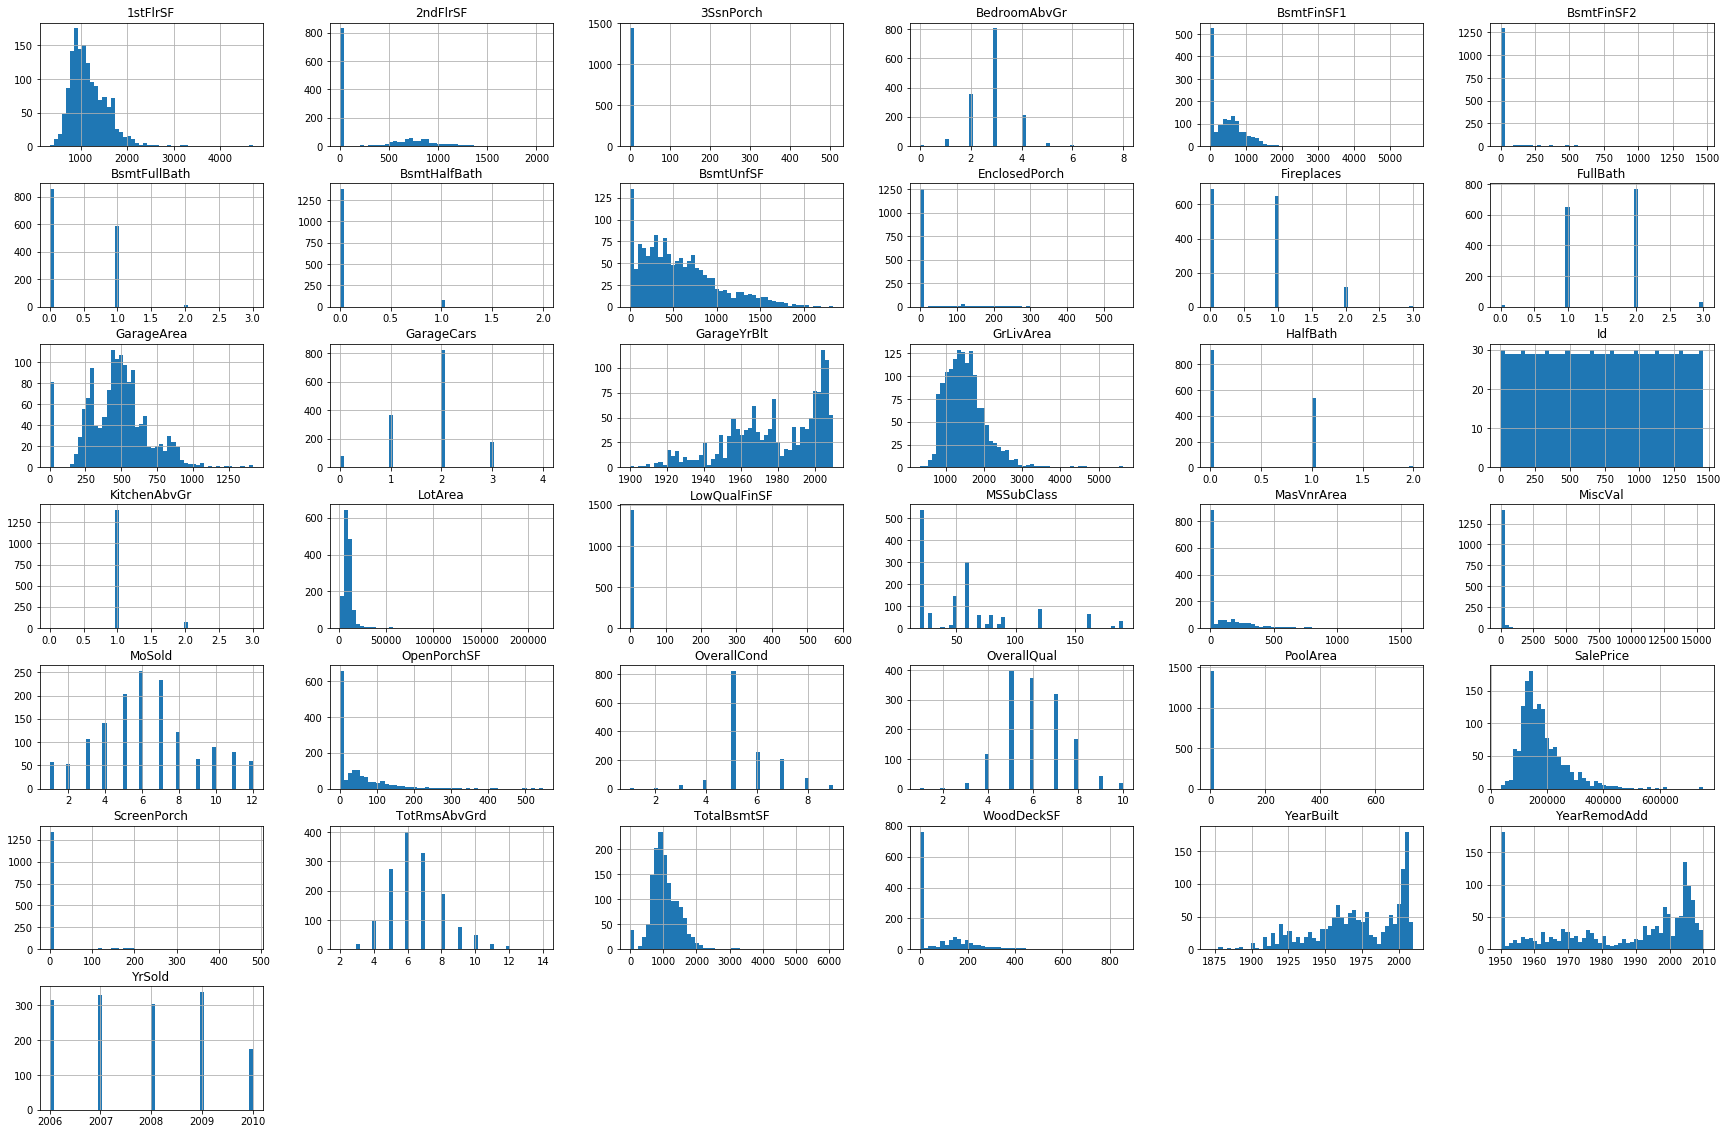

In [39]:
df_train.hist(bins=50, figsize=(30,20));


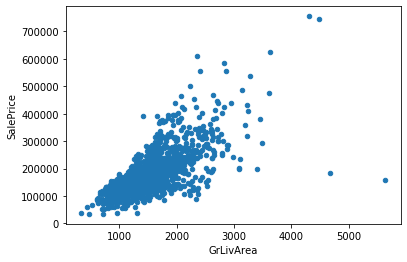

In [44]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')



(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

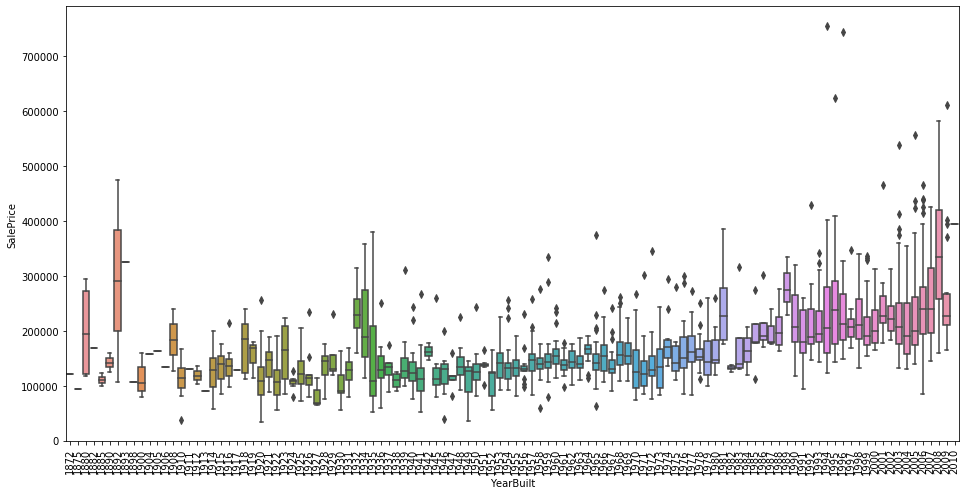

In [48]:
var='YearBuilt'
data = pd.concat([df_train[var],df_train['SalePrice']],axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
plt.xticks(rotation=90)

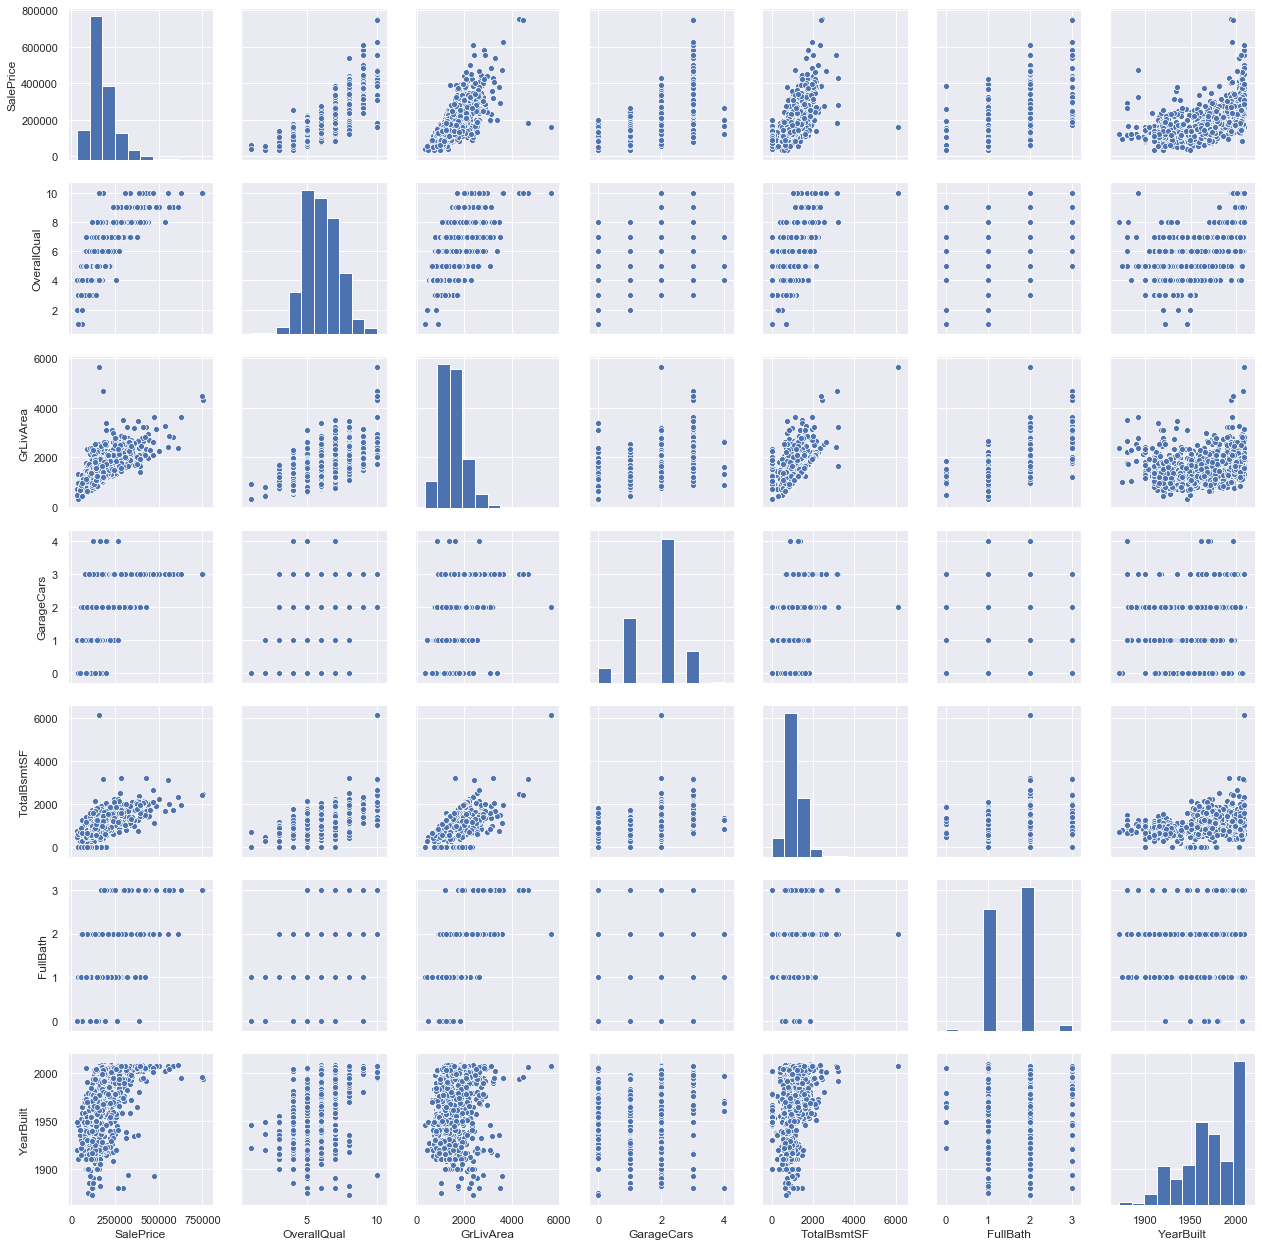

In [50]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height = 2.5)
plt.show()

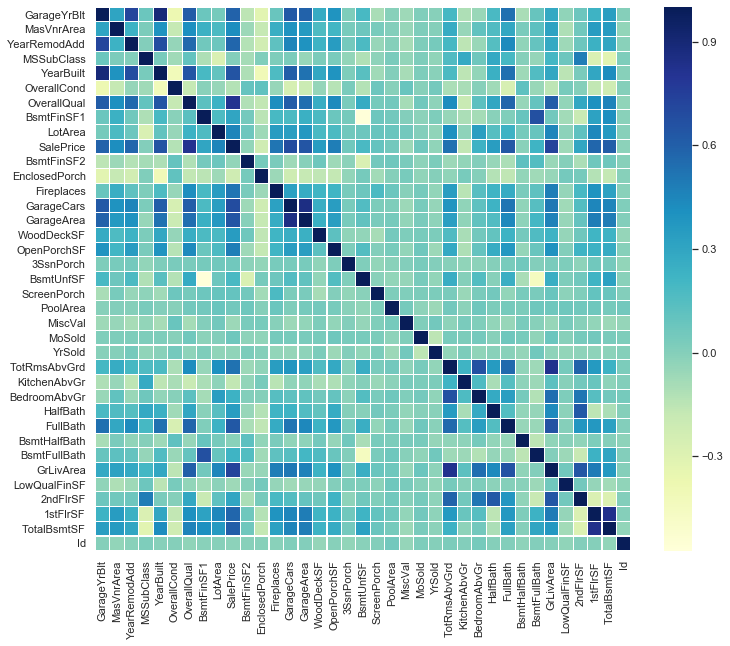

In [51]:
corrmat = df_train.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

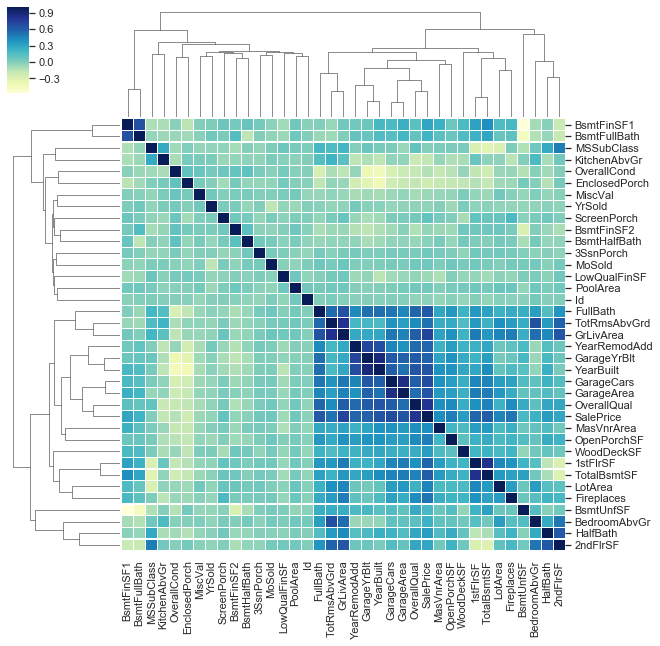

In [52]:
#correlation matrix
corrmat = df_train.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

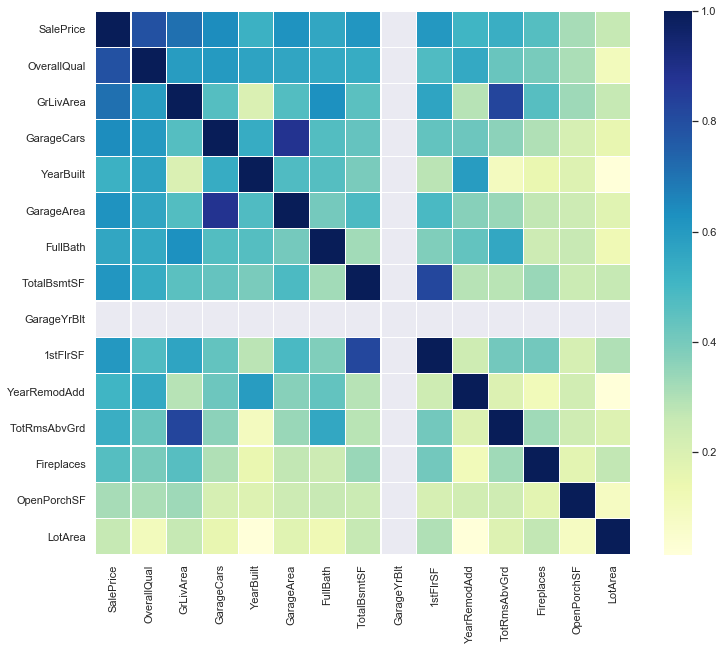

In [60]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)
            

In [58]:
k = 15
corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'GarageArea', 'FullBath', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF',
       'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'OpenPorchSF', 'LotArea'],
      dtype='object')

In [61]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.52289733,
        0.62343144, 0.56066376, 0.61358055,        nan, 0.60585218,
        0.50710097, 0.53372316, 0.46692884, 0.31585623, 0.26384335],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.57232277,
        0.56202176, 0.55059971, 0.5378085 ,        nan, 0.47622383,
        0.55068392, 0.42745234, 0.39676504, 0.30881882, 0.10580574],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.19900971,
        0.46899748, 0.63001165, 0.4548682 ,        nan, 0.56602397,
        0.28738852, 0.82548937, 0.46167913, 0.33022396, 0.26311617],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.53785009,
        0.88247541, 0.46967204, 0.43458483,        nan, 0.43931681,
        0.42062215, 0.36228857, 0.30078877, 0.21356945, 0.15487074],
       [0.52289733, 0.57232277, 0.19900971, 0.53785009, 1.        ,
        0.47895382, 0.46827079, 0.391452  ,        nan, 0.28198586,
        0.59285498, 0.09558913, 0.1477164 , 

In [62]:
df_train[cols].values.T

array([[2.08500e+05, 1.81500e+05, 2.23500e+05, ..., 2.66500e+05,
        1.42125e+05, 1.47500e+05],
       [7.00000e+00, 6.00000e+00, 7.00000e+00, ..., 7.00000e+00,
        5.00000e+00, 5.00000e+00],
       [1.71000e+03, 1.26200e+03, 1.78600e+03, ..., 2.34000e+03,
        1.07800e+03, 1.25600e+03],
       ...,
       [0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 2.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.10000e+01, 0.00000e+00, 4.20000e+01, ..., 6.00000e+01,
        0.00000e+00, 6.80000e+01],
       [8.45000e+03, 9.60000e+03, 1.12500e+04, ..., 9.04200e+03,
        9.71700e+03, 9.93700e+03]])